In [6]:
import matplotlib.pyplot as plt
import numpy as np


# KE2 Aufgabe 3
# Years and actual values
years = [1959, 1964, 1969, 1974, 1979, 1984, 1989,1994,1999,2004,2009,2014,2019]
actual_values = [16.1, 16.9, 14.8, 14.1, 16.5, 13.7,15.3,15.9,15.2,15.3, 14.8,16.1,19.8]

# Smoothed Mean / Werte geglättet mit gleitendem Arithmetischen Mittelwert
k = 3  # Bucket size for smoothing, i.e. (last, this, next) / k-Wert vorgegeben
alpha = 0.25  # Smoothing parameter for Exponential Smoothing / Alpha-Parameter für die exponentielle Glättung
y0 = actual_values[0]  # Initial value (y0 = x1), vorgegeben

# Compute the smoothed mean using a simple moving average
# Gegl. AM-Berechnung mit Numpy durchführen
smoothed_mean = np.convolve(actual_values, np.ones(k)/k, mode='valid')

# Adjust the years array to match the smoothed data length
# Beachtet werden sollen die fehlenden MW für i = 1 = x1
smoothed_years_mean = years[k-1:]

# Exponential smoothing
smoothed_values = [y0]
for x in actual_values:
    smoothed_value = alpha * x + (1 - alpha) * smoothed_values[-1]
    smoothed_values.append(smoothed_value)
smoothed_values = smoothed_values[1:]
smoothed_years_exp = years

# Print pairs of years and values for each function
print(f"\nPairs of years and values for Smoothed Mean (k={k}):")
for year, mean in zip(smoothed_years_mean, smoothed_mean):
    print(f"Year: {year}, Smoothed Mean: {mean}")

print(f"\nPairs of years and values for Exponential Smoothing (alpha={alpha}):")
for year, exp_smoothed in zip(smoothed_years_exp, smoothed_values):
    print(f"Year: {year}, Exponential Smoothing: {exp_smoothed}")




Pairs of years and values for Smoothed Mean (k=3):
Year: 1969, Smoothed Mean: 15.933333333333334
Year: 1974, Smoothed Mean: 15.266666666666666
Year: 1979, Smoothed Mean: 15.133333333333333
Year: 1984, Smoothed Mean: 14.766666666666666
Year: 1989, Smoothed Mean: 15.166666666666666
Year: 1994, Smoothed Mean: 14.966666666666665
Year: 1999, Smoothed Mean: 15.466666666666665
Year: 2004, Smoothed Mean: 15.466666666666667
Year: 2009, Smoothed Mean: 15.1
Year: 2014, Smoothed Mean: 15.4
Year: 2019, Smoothed Mean: 16.9

Pairs of years and values for Exponential Smoothing (alpha=0.25):
Year: 1959, Exponential Smoothing: 16.1
Year: 1964, Exponential Smoothing: 16.3
Year: 1969, Exponential Smoothing: 15.925
Year: 1974, Exponential Smoothing: 15.468750000000002
Year: 1979, Exponential Smoothing: 15.726562500000002
Year: 1984, Exponential Smoothing: 15.219921875
Year: 1989, Exponential Smoothing: 15.23994140625
Year: 1994, Exponential Smoothing: 15.404956054687501
Year: 1999, Exponential Smoothing: 

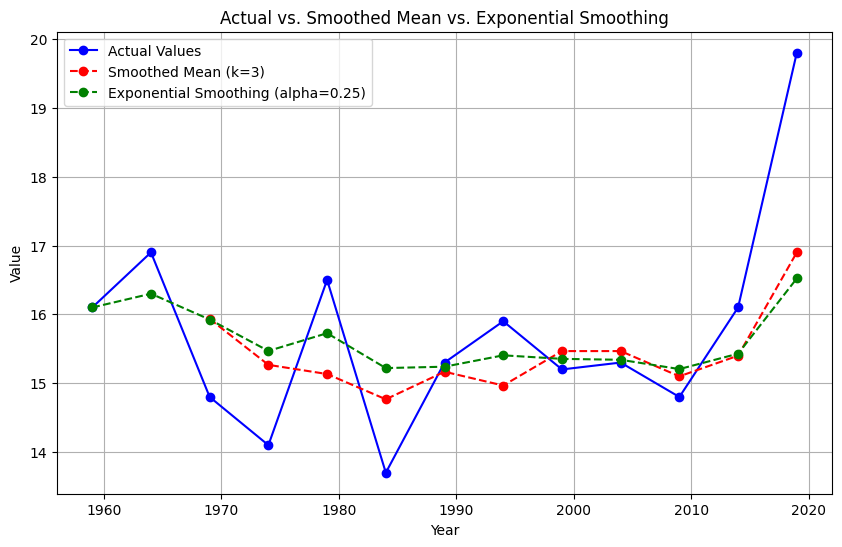

In [7]:
import matplotlib.pyplot as plt
# Create the plot
# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(years, actual_values, marker='o', label='Actual Values', linestyle='-', color='blue')
plt.plot(smoothed_years_mean, smoothed_mean, marker='o', label=f'Smoothed Mean (k={k})', linestyle='--', color='red')
plt.plot(years, smoothed_values, marker='o', label=f'Exponential Smoothing (alpha={alpha})', linestyle='--', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Actual vs. Smoothed Mean vs. Exponential Smoothing')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()